# An Introduction to Combining Data with Pandas' `merge`, `join`, and `concat`

This notebook contains code examples to use with the article of the same name, along with light commentary on each of the examples. 

Based on: https://realpython.com/pandas-merge-join-and-concat/


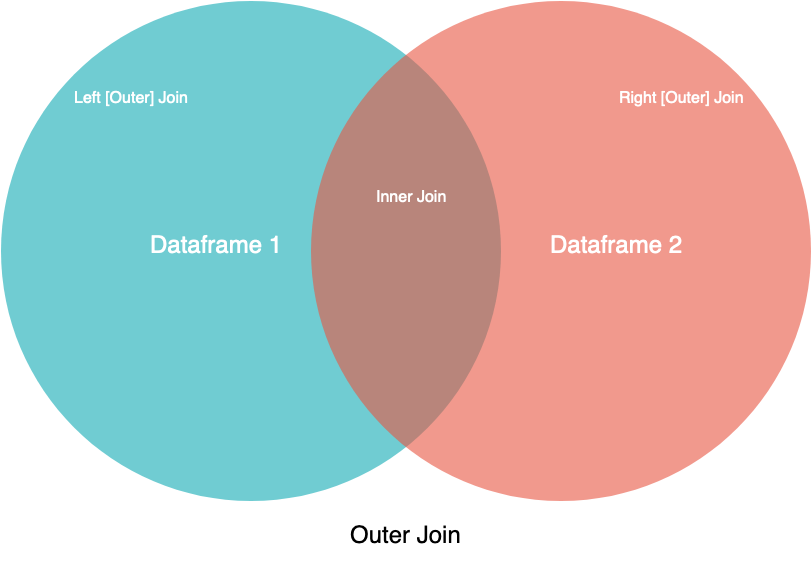

In [1]:
import pandas as pd


## Importing Data

Here you will import the temperature and precipitation climate normals datasets into DataFrames. Calling `.head()` on the DataFrame will give you a 5 row preview of your data, and the `shape` attribute will give you the dimensions of the data in the form `(rows, columns)`. These are great sanity checks to run before doing too much with the data. 

In [2]:
climate_temp = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/eda_couse/main/climate_temp.csv")
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,0,0,0,-7777,-7777,2,5,7,10,15


In [3]:
climate_temp.shape

(127020, 21)

In [4]:
climate_precip = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/eda_couse/main/climate_precip.csv")
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0


In [5]:
climate_precip.shape

(151110, 29)

## merge()

In this section, you will learn about `merge()` functionality in Pandas.

### Inner Join

Here, you will use a plain `merge()` call to do an inner join and learn how this can result in a smaller, more focused dataset. First, you will create a new DataFrame object that contains the precipitation data from one station.

In [6]:
precip_one_station = climate_precip.query("STATION == 'GHCND:USC00045721'")
precip_one_station.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,11,4,0,3,2,10,6,0,-9999,-9999


In [7]:
precip_one_station.shape

(365, 29)

In [8]:
inner_merged = pd.merge(precip_one_station, climate_temp)
inner_merged.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


How many rows do you think this merged DataFrame has?

In [9]:
inner_merged.shape

(365, 47)

You get 365 rows because any non-matching rows are discarded in an inner join, which is the default merge method for a `merge()` call, and `precip_one_station` had only 365 rows.

What if you want to merge both full datasets, but specify which columns to join on? In this case, you will use the `on` parameter:

In [10]:
inner_merged_total = pd.merge(
    climate_temp, climate_precip, on=["STATION","DATE"]
)
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0


In [11]:
inner_merged_total.shape

(123005, 48)

You can specify a single _key column_ with a string, or multiple key columns with a list, as in the above example. This results in a DataFrame with 123005 rows and 48 columns. 

Why 48 columns instead of 47? Because you specified the keys columns to join on, Pandas doesn't try to merge all mergeable columns. This can result in "duplicate" column names, which may or may not have different values. "Duplicate" is in quotes because the columns will actually have new names, by default they are appended with `_x` and `_y`. You can also use the `suffixes` parameter to control what is appended to the column names.

### Outer Join
With the outer join, you will retain rows that don't have matches as well. For this example, you will use the smaller precipitation DataFrame `precip_one_station` with the full `climate_temp` DataFrame and join with `STATION` and `DATE` columns as the key columns. Take a second and think about how many rows you expect the new DataFrame to have.

In [12]:
outer_merged = pd.merge(
    precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"]
)
outer_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666.0,-66.6,0.16,-666.0,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666.0,-66.6,0.17,-666.0,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


In [13]:
outer_merged.shape

(127020, 48)

If you remember from when you checked the `.shape` attribute of `climate_temp`, you'll see that the number of rows in `outer_merged` matches that. With an outer join, you can expect to have the same number of rows as the larger DataFrame, since none are lost like they are in an inner join. 

### Left Join
Also known as a left outer join. In this join, you will retain rows that don't have matches only on the left (or first) DataFrame to be merged.

In [14]:
left_merged = pd.merge(
    climate_temp, precip_one_station, how="left", on=["STATION", "DATE"]
)
left_merged.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
left_merged.shape

(127020, 48)

Here, you see that the number of rows in the resulting DataFrame matches that of the rows in the `climate_temp` DataFrame. What if we switched the positions of the two DataFrames that we are merging?

In [16]:
left_merged_reversed = pd.merge(
    precip_one_station, climate_temp, how="left", on=["STATION", "DATE"]
)
left_merged_reversed.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


In [17]:
left_merged_reversed.shape

(365, 48)

### Right Join
This works the same as the left join, however non-matching rows are only retained in the _right_ DataFrame. In the next example, you will recreate the `left_merged` DataFrame but with a right join.

In [18]:
right_merged = pd.merge(
    precip_one_station, climate_temp, how="right", on=["STATION", "DATE"]
)
right_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,NaN,20100101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,NaN,20100102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,NaN,20100103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,NaN,20100104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,NaN,20100105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,-7777,2,5,7,10,15


In [19]:
right_merged.shape

(127020, 48)

Here, you simply flipped the positions of the input DataFrames and specified a right join. When you inspect `right_merged`, you might notice that it's not exactly the same as `left_merged`. The only difference between the two is the order of the columns: the first input's columns will always be the first in the newly formed DataFrame.

## .join()
`.join()` uses `merge()` under the hood, but provides a much more simplified interface to `merge()` and by default joins on indexes. Here is an introductory example using the `lsuffix` and `rsuffix` parameters to handle overlapping column names.

In [20]:
precip_one_station.join(climate_temp, lsuffix="_left", rsuffix="_right")

,STATION_left,STATION_NAME_left,DATE_left,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,...,-7777,0,0,1,3,6,10,12,15,20
1821,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20
1822,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20
1823,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20


If you inspect the data, you'll see that overlapping columns are kept, just renamed to be unique. If we flip this around and instead call `.join()` on the larger DataFrame, you'll notice that the DataFrame is larger, but data that doesn't exist in the smaller DataFrame (`precip_one_station`) is filled in with `NaN` (_Not a Number_) values.

In [21]:
climate_temp.join(precip_one_station, lsuffix="_left", rsuffix="_right")

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you must use `.join()` and want to merge the columns, you must set them to be indexes first. First take a look at this previously used `merge()` operation:

In [22]:
inner_merged_total = pd.merge(
    climate_temp, climate_precip, on=["STATION", "DATE"]
)
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0


In [23]:
inner_joined_total = climate_temp.join(
    climate_precip.set_index(["STATION", "DATE"]),
    on=["STATION", "DATE"],
    how="inner",
    lsuffix="_x",
    rsuffix="_y",
)
inner_joined_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0


Because `.join()` works on indexes, if we want to recreate `merge()` before, then we must set indexes on the join columns we specify. In this example, you used the `.set_index()` method to set your indexes to the key columns within the join. 

Below you will see an almost-bare `.join()` call. Because there are overlapping columns, you will have to specify a suffix with `lsuffix`, `rsuffix`, or both, but this example will demonstrate the more typical behavior of `.join()`.

In [24]:
climate_temp.join(climate_precip, lsuffix="_left")

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,...,15,0,0,0,0,0,0,0,0,0
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,...,15,0,0,0,0,0,0,0,0,0
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,...,16,0,0,0,0,0,0,0,0,0
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,...,16,0,0,0,0,0,0,0,0,0


## concat()

First, you will see a basic concatenation along axis 0.

In [25]:
double_precip = pd.concat([precip_one_station, precip_one_station])
double_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,11,4,0,3,2,10,6,0,-9999,-9999


To reset the index, use the `ignore_index` optional parameter.

In [26]:
reindexed = pd.concat(
    [precip_one_station, precip_one_station], ignore_index=True
)
reindexed.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,9,6,0,-9999,-9999
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,10,6,0,-9999,-9999
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,3,10,6,0,-9999,-9999
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,2,10,6,0,-9999,-9999
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,11,4,0,3,2,10,6,0,-9999,-9999


When axis labels for the axis you are **not** concatenating along don't match (for example, column labels when concatenating along rows), then all columns are preserved and missing data is filled in with `NaN`. 

In [27]:
outer_joined = pd.concat([climate_precip, climate_temp])
outer_joined.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
inner_joined = pd.concat([climate_temp, climate_precip], join="inner")
inner_joined.head()

,STATION,STATION_NAME,DATE
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105


In [29]:
inner_joined.shape

(278130, 3)

To illustrate how this would work with rows, concatenate along columns instead:

In [30]:
inner_joined_cols = pd.concat(
    [climate_temp, climate_precip], axis="columns", join="inner"
)
inner_joined.head()

,STATION,STATION_NAME,DATE
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105


In [31]:
inner_joined_cols.shape

(127020, 50)

You can also use the `keys` parameter to set hierarchical axis labels which can be used, for example, to preserve original labels while maintaining labels that tell you which dataset each row or column came from.

In [32]:
hierarchical_keys = pd.concat(
    [climate_temp, climate_precip], keys=["temp", "precip"]
)
hierarchical_keys.head()

STATION            STATION_NAME ELEVATION  LATITUDE  \
temp 0  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     1  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     2  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     3  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     4  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   

         LONGITUDE      DATE  DLY-CLDD-BASE45  DLY-CLDD-BASE50  \
temp 0  -116.03694  20100101              6.0              2.0   
     1  -116.03694  20100102              6.0              2.0   
     2  -116.03694  20100103              6.0              2.0   
     3  -116.03694  20100104              6.0              2.0   
     4  -116.03694  20100105              6.0              2.0   

        DLY-CLDD-BASE55  DLY-CLDD-BASE57  ...  DLY-PRCP-PCTALL-GE100HI  \
temp 0          -7777.0          -7777.0  ...                      NaN   
     1              1.0          -7777.0  ...                      NaN   
     2              1.0          -7777.0  ...                      NaN   
     3              1.0          -7777.0  ...                      NaN   
     4              1.0          -7777.0  ...                      NaN   

        DLY-SNWD-PCTALL-GE001WI  DLY-SNWD-PCTALL-GE010WI  \
temp 0                      NaN                      NaN   
     1                      NaN                      NaN   
     2                      NaN                      NaN   
     3                      NaN                      NaN   
     4                      NaN                      NaN   

        DLY-SNWD-PCTALL-GE003WI  DLY-SNWD-PCTALL-GE005WI  \
temp 0                      NaN                      NaN   
     1                      NaN                      NaN   
     2                      NaN                      NaN   
     3                      NaN                      NaN   
     4                      NaN                      NaN   

        DLY-SNOW-PCTALL-GE001TI  DLY-SNOW-PCTALL-GE010TI  \
temp 0                      NaN                      NaN   
     1                      NaN                      NaN   
     2                      NaN                      NaN   
     3                      NaN                      NaN   
     4                      NaN                      NaN   

        DLY-SNOW-PCTALL-GE100TI  DLY-SNOW-PCTALL-GE030TI  \
temp 0                      NaN                      NaN   
     1                      NaN                      NaN   
     2                      NaN                      NaN   
     3                      NaN                      NaN   
     4                      NaN                      NaN   

        DLY-SNOW-PCTALL-GE050TI  
temp 0                      NaN  
     1                      NaN  
     2                      NaN  
     3                      NaN  
     4                      NaN  

[5 rows x 47 columns]

In [33]:
hierarchical_keys.tail()

STATION            STATION_NAME ELEVATION LATITUDE  \
precip 151105  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151106  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151107  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151108  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151109  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   

              LONGITUDE      DATE  DLY-CLDD-BASE45  DLY-CLDD-BASE50  \
precip 151105       NaN  20101227              NaN              NaN   
       151106       NaN  20101228              NaN              NaN   
       151107       NaN  20101229              NaN              NaN   
       151108       NaN  20101230              NaN              NaN   
       151109       NaN  20101231              NaN              NaN   

               DLY-CLDD-BASE55  DLY-CLDD-BASE57  ...  DLY-PRCP-PCTALL-GE100HI  \
precip 151105              NaN              NaN  ...                     62.0   
       151106              NaN              NaN  ...                     62.0   
       151107              NaN              NaN  ...                     63.0   
       151108              NaN              NaN  ...                     64.0   
       151109              NaN              NaN  ...                     64.0   

               DLY-SNWD-PCTALL-GE001WI  DLY-SNWD-PCTALL-GE010WI  \
precip 151105                  -9999.0                  -9999.0   
       151106                  -9999.0                  -9999.0   
       151107                  -9999.0                  -9999.0   
       151108                  -9999.0                  -9999.0   
       151109                  -9999.0                  -9999.0   

               DLY-SNWD-PCTALL-GE003WI  DLY-SNWD-PCTALL-GE005WI  \
precip 151105                  -9999.0                  -9999.0   
       151106                  -9999.0                  -9999.0   
       151107                  -9999.0                  -9999.0   
       151108                  -9999.0                  -9999.0   
       151109                  -9999.0                  -9999.0   

               DLY-SNOW-PCTALL-GE001TI  DLY-SNOW-PCTALL-GE010TI  \
precip 151105                  -9999.0                  -9999.0   
       151106                  -9999.0                  -9999.0   
       151107                  -9999.0                  -9999.0   
       151108                  -9999.0                  -9999.0   
       151109                  -9999.0                  -9999.0   

               DLY-SNOW-PCTALL-GE100TI  DLY-SNOW-PCTALL-GE030TI  \
precip 151105                  -9999.0                  -9999.0   
       151106                  -9999.0                  -9999.0   
       151107                  -9999.0                  -9999.0   
       151108                  -9999.0                  -9999.0   
       151109                  -9999.0                  -9999.0   

               DLY-SNOW-PCTALL-GE050TI  
precip 151105                  -9999.0  
       151106                  -9999.0  
       151107                  -9999.0  
       151108                  -9999.0  
       151109                  -9999.0  

[5 rows x 47 columns]